# Grating Coupler Design - Jupyter Notebook

---
# 1D Grating Coupler Design
In this notebook, we will derive and calculate the key parameters required to design a 1D grating coupler. 
Grating couplers are essential components in photonic circuits for coupling light between fiber and chip.
---

## Importing Necessary Libraries
Import essential libraries for numerical calculations and plotting.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown


## Design Parameters
Let's define key parameters for the grating coupler design. You can change these values as per your requirements.

In [39]:
# Wavelength of the input light in microns
wavelength = 1.55  # microns

# Effective index of the waveguide mode (estimated)
n_eff = 2.5  

# Refractive index of the cladding (e.g., air or oxide)
n_clad = 1.0

# Coupling angle of the grating (in degrees, with respect to normal incidence)
theta_coupler = 10  # degrees

## 1. Calculating the Grating Period
The grating period can be calculated using the phase-matching condition:
 
$$ \Lambda = \frac{\lambda_0}{n_{\text{eff}} - n_{\text{clad}} \sin(\theta_{\text{coupler}})} $$
 
Where:
- $\lambda_0$ is the wavelength of light in free space
- $n_{\text{eff}}$ is the effective index of the waveguide mode
- $n_{\text{clad}}$ is the refractive index of the cladding
- $\theta_{\text{coupler}}$ is the coupling angle

In [40]:
# Convert coupling angle to radians for calculation
theta_rad = np.radians(theta_coupler)

# Calculate the grating period
grating_period = wavelength / (n_eff - n_clad * np.sin(theta_rad))
print(f"Grating Period (Λ): {grating_period:.3f} microns")

Grating Period (Λ): 0.666 microns


## 2. Duty Cycle Calculation
The duty cycle is defined as the ratio of the width of the etched region (or high-index region) to the period.
 
Assuming a target effective index for the grating, the duty cycle $DC$ can be calculated as:
 
$$ DC = \frac{n_{\text{eff, target}} - n_{\text{clad}}}{n_{\text{eff}} - n_{\text{clad}}} $$
 
For simplicity, let’s assume the target effective index of the grating is the average of $n_{\text{eff}}$ and $n_{\text{clad}}$.

In [41]:
# Define target effective index
n_eff_target = (n_eff + n_clad) / 2

# Calculate duty cycle
duty_cycle = (n_eff_target - n_clad) / (n_eff - n_clad)
print(f"Duty Cycle (DC): {duty_cycle:.3f}")

Duty Cycle (DC): 0.500


## 3. Grating Coupler Efficiency
A rough estimate of the grating coupler efficiency can be made by considering factors such as the overlap between the fiber mode and the grating mode, radiation angle, and scattering losses.
 
Here, we will assume a simple model for efficiency $\eta$ based on the overlap of mode profiles and material losses.

In [42]:
# Coupling efficiency parameter (empirical, varies based on design, generally between 0.5 and 0.9)
overlap_factor = 0.7  

# Assuming an arbitrary material loss factor for simplicity
material_loss_factor = 0.9

# Calculate the efficiency
efficiency = overlap_factor * material_loss_factor
print(f"Estimated Grating Coupler Efficiency: {efficiency * 100:.2f}%")

Estimated Grating Coupler Efficiency: 63.00%


## 4. Visualizing the Grating Coupler Structure
Let’s plot the basic grating structure, illustrating the period and duty cycle for clarity.

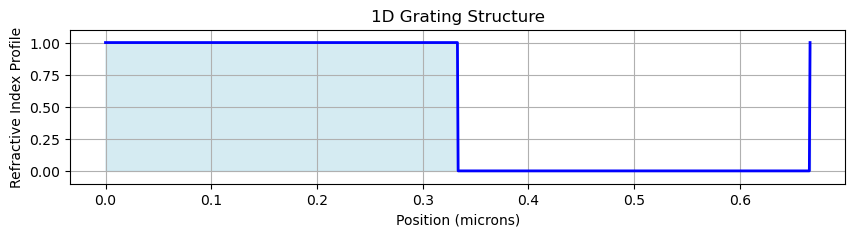

In [43]:
# Define x-axis for one period
x = np.linspace(0, grating_period, 1000)

# Define the grating structure with duty cycle
y = np.where((x % grating_period) < (duty_cycle * grating_period), 1, 0)

# Plotting the grating structure
plt.figure(figsize=(10, 2))
plt.plot(x, y, color='blue', linewidth=2)
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.title("1D Grating Structure")
plt.xlabel("Position (microns)")
plt.ylabel("Refractive Index Profile")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

In [44]:
summary_md = f"""
---
# Summary of Results
- Grating Period (Λ): {grating_period:.3f} microns
- Duty Cycle (DC): {duty_cycle:.3f}
- Estimated Coupling Efficiency: {efficiency * 100:.2f}%

### Conclusion
These results provide a preliminary 1D analytical design for the grating coupler. 
Further simulations (e.g., FDTD) would help refine this design.
---
"""

display(Markdown(summary_md))


---
# Summary of Results
- Grating Period (Λ): 0.666 microns
- Duty Cycle (DC): 0.500
- Estimated Coupling Efficiency: 63.00%

### Conclusion
These results provide a preliminary 1D analytical design for the grating coupler. 
Further simulations (e.g., FDTD) would help refine this design.
---
